# Pymaceuticals Inc.
---

### Analysis

Based on the final statistics, an increase in weight is stronly correlated to a larger size for the tumor when it is present in the mice studied. The treatment capomulin is also very effective within the first 35 or so days, but then appears to fail after that time. 


### Recommendations:

Based on my review, it appears that at least for what has been studied in mice, a reduction in body weight could be a preventative step to having smaller, more treatable tumors. I would recommend that the study begin trials on humans or at least larger mammals. 

### Conclusion:

Overall the study was very fair in it's representation of female versus male rats. There are further studies that are needed, but it is clear that the weight of the rat can be used as a predictor for the range in size of the tumor if one is present. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
total_mice = combined_data["Mouse ID"].nunique()
total_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

duplicate_mouse_ids = duplicates["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = combined_data[combined_data["Mouse ID"]=="g989"]

duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data['Mouse ID']!='g989']
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = clean_df["Mouse ID"].nunique()
new_mice_count

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_stats = pd.DataFrame()

mean = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
summary_stats["Mean"] = mean

median = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
summary_stats["Median"] = median

var = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
summary_stats["Variance"] = var

std = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
summary_stats["Standard Deviation"] = std
    
sem = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()
summary_stats["SEM"] = sem

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg([
    ("Mean Tumor Volume", "mean"),
    ("Median Tumor Volume", "median"),
    ("Tumor Volume Variance", "var"),
    ("Tumor Volume Std. Dev.", "std"),
    ("Tumor Volume Std. Err.", "sem"),
])
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

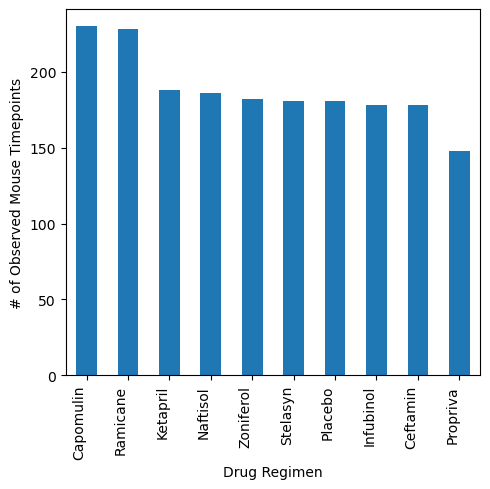

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = clean_df["Drug Regimen"].value_counts()

bar_plot = drug_counts.plot(kind="bar", figsize=(5,5))
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90, ha="right")
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

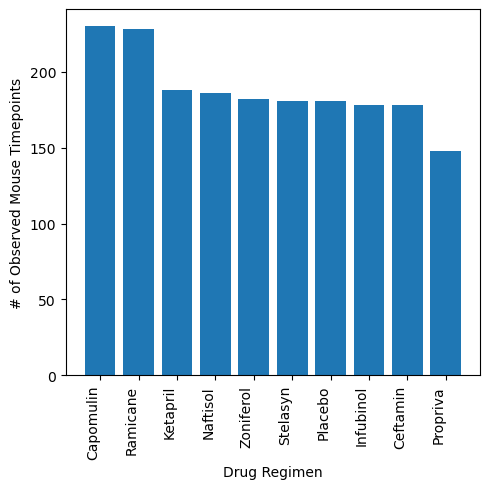

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
fig, bar_plot = plt.subplots(figsize=(5,5))
bar_plot.bar(drug_counts.index, drug_counts.values)
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90, ha="right")
plt.tight_layout()
plt.show

(-1.0999999932310978,
 1.0999999996776713,
 -1.0999999925716069,
 1.0999999987135378)

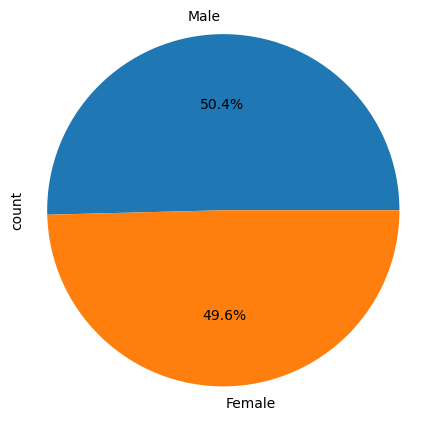

In [14]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_df.drop_duplicates(subset=['Mouse ID'])
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
pie_chart = gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=0, figsize=(5, 5))
#plt.ylabel('')  # Remove the y-label
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle


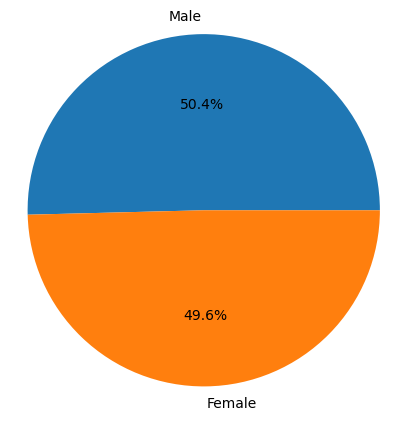

In [15]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=0)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, clean_df, on=['Mouse ID', 'Timepoint'], how='left')
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatment_regimens)]
final_tumor_volume = final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
print(final_tumor_volume.head())


  Mouse ID Drug Regimen  Tumor Volume (mm3)
0     a203    Infubinol           67.973419
1     a251    Infubinol           65.525743
3     a275     Ceftamin           62.999356
6     a411     Ramicane           38.407618
7     a444     Ramicane           43.047543


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']


    # add subset
    tumor_vol_data.append(tumor_volumes)
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile


    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)

    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

#print
    outlier_string = outliers.to_string(index=True, header=False)
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


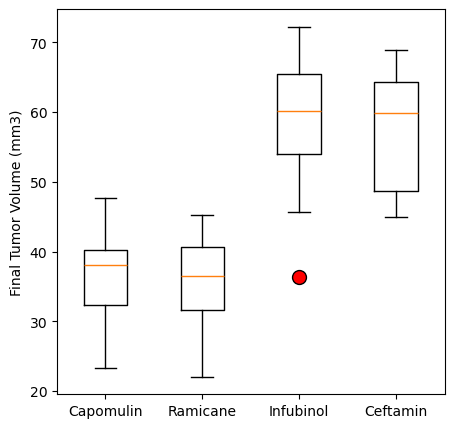

In [19]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, box_plot = plt.subplots(figsize=(5, 5))
# Create the box plot
box_plot.set_ylabel('Final Tumor Volume (mm3)')
flierprops = dict(marker='o', markerfacecolor='red', markersize=10,  markeredgecolor='black')
box_plot.boxplot(tumor_vol_data, tick_labels=treatments, flierprops=flierprops)
plt.show()

## Line and Scatter Plots

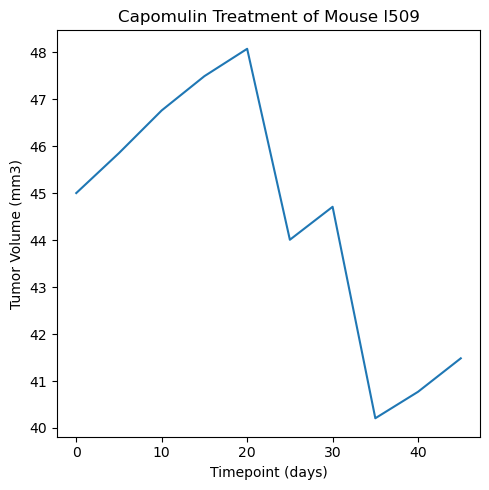

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# First, let's select a mouse treated with Capomulin
capomulin_data = clean_df[clean_df['Drug Regimen']=='Capomulin']

selected_mouse = "l509"

mouse_data = capomulin_data[capomulin_data['Mouse ID']==selected_mouse]

mouse_data = mouse_data.sort_values('Timepoint')

plt.figure(figsize=(5, 5))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.title('Capomulin Treatment of Mouse l509')
plt.tight_layout()
plt.show()

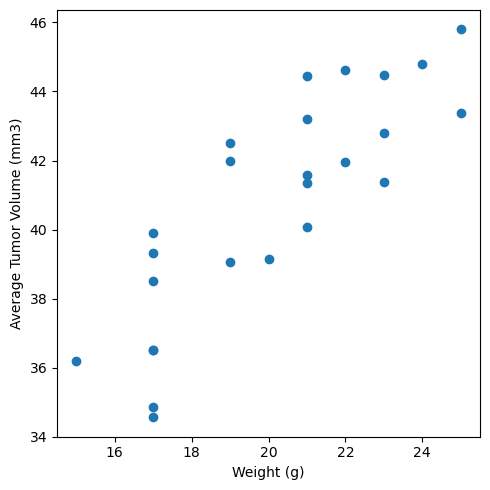

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_avg = capomulin_data.groupby('Mouse ID').agg({
    'Weight (g)': 'mean',
    'Tumor Volume (mm3)': 'mean'
}).reset_index()

# Create the scatter plot
plt.figure(figsize=(5, 5))
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8419363424694722


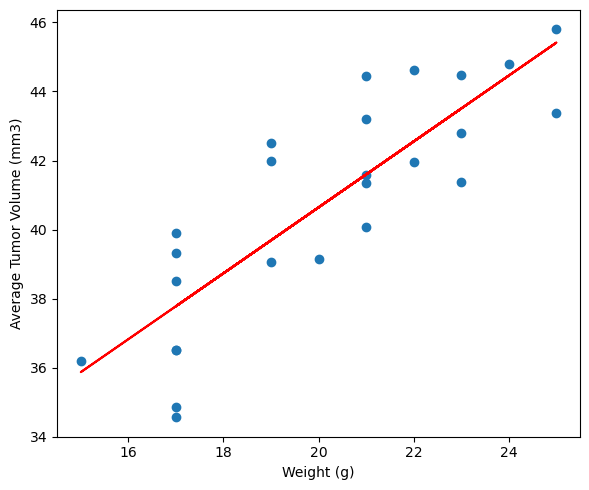

In [24]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_avg = capomulin_data.groupby('Mouse ID').agg({
    'Weight (g)': 'mean',
    'Tumor Volume (mm3)': 'mean'
})

correlation = capomulin_avg['Weight (g)'].corr(capomulin_avg['Tumor Volume (mm3)'])

x = capomulin_avg['Weight (g)']
y = capomulin_avg['Tumor Volume (mm3)']
slope, intercept, _, _, _ = st.linregress(x, y)

#graph
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")
plt.figure(figsize=(6, 5))
plt.scatter(x, y)

# Add the regression line
plt.plot(x, slope * x + intercept, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.tight_layout()
plt.show()